In [4]:
from random import random
from math import floor, log, exp, factorial

In [5]:
def bernoulli(p):
  return 1 if random()<p else 0

In [6]:
def binomial(n,p):
  return sum(bernoulli(p) for _ in range(n))

In [7]:
def uniform(n):
  if type(n)==int:
    return floor(n*random())
  if type(n)==list:
    return n[uniform(len(n))]

In [8]:
def geometric(p):
  n=1
  while bernoulli(p)==0:
    n += 1
  return n

In [9]:
def geometric(p):
  return floor(log(1-random())/log(1-p))+1

In [10]:
def fini(proba):
  r = random()
  s = sum(proba)
  sp = proba[0]/s
  n = 0
  while r >= sp:
    n += 1
    sp += proba[n]/s
  return n

In [11]:
def infini(proba):
    r = random()
    n = 0
    s = proba(0)
    while r >= s:
        n += 1
        s += proba(n)
    return n

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
N=100000

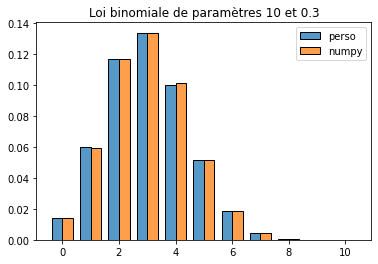

In [13]:
n=10
p=.3
df = pd.DataFrame({
    "perso": np.array([binomial(n,p) for _ in range(N)]),
    "numpy": np.random.binomial(n,p,N)
})
sns.histplot(
    df.melt(var_name=''),
    x='value',hue='',
    multiple='dodge',
    shrink=.75,
    bins=np.arange(-0.5, n+1.5, 1.),
    stat='density',)
plt.title('Loi binomiale de paramètres '+str(n)+' et '+str(p))
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../images/2022/03/binomiale.png')

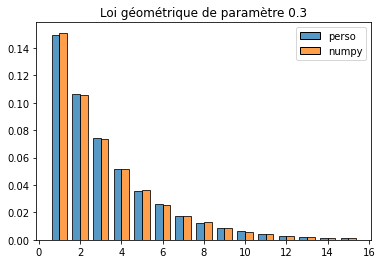

In [14]:
p=.3
n=15
df = pd.DataFrame({
    "perso": np.array([geometric(p) for _ in range(N)]),
    "numpy": np.random.geometric(p,N)
})
sns.histplot(
    df.melt(var_name=''),
    x='value', hue='',
    multiple='dodge',
    shrink=.75,
    bins=np.arange(0.5, n+1.5, 1.),
    stat='density')
plt.title('Loi géométrique de paramètre '+str(p))
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../images/2022/03/geometrique.png')

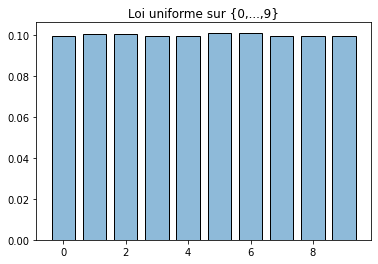

In [15]:
n=10
df = pd.DataFrame({
    "Loi uniforme": np.array([uniform(n) for _ in range(N)]),
})
sns.histplot(
    df,
    shrink=.75,
    bins=np.arange(-0.5, n+.5, 1.),
    stat='density',
    legend=False);
plt.title('Loi uniforme sur {0,...,'+str(n-1)+'}')
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../images/2022/03/uniforme.png')

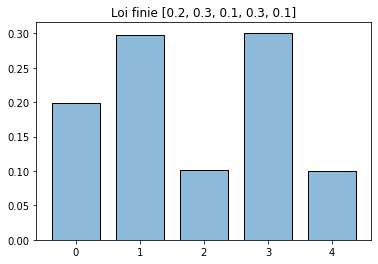

In [16]:
p=[0.2,0.3,0.1,0.3,0.1]
df = pd.DataFrame({
    "Loi finie": np.array([fini(p) for _ in range(N)]),
})
sns.histplot(
    df,
    shrink=.75,
    bins=np.arange(-0.5, len(p)+.5, 1.),
    stat='density',
    legend=False);
plt.title('Loi finie '+str(p))
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../images/2022/03/finie.png')

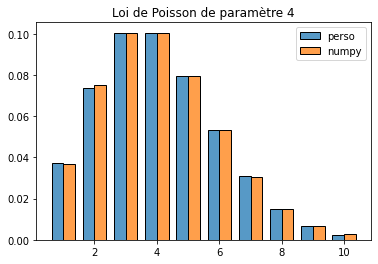

In [17]:
l=4
poisson=lambda l: infini(lambda n: exp(-l)*l**n/factorial(n))
df = pd.DataFrame({
    "perso": np.array([poisson(l) for _ in range(N)]),
    "numpy": np.random.poisson(l,N)
})
sns.histplot(
    df.melt(var_name=''),
    x='value', hue='',
    multiple='dodge',
    shrink=.75,
    bins=np.arange(0.5, n+1.5, 1.),
    stat='density')
plt.title('Loi de Poisson de paramètre '+str(l))
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../images/2022/03/infinie.png')

In [18]:
def poisson(l):
    r = random()
    f = exp(-l)
    F = f
    k = 1
    while F<r:
        f = l / k * f
        F = F + f
        k = k + 1
    return k - 1

In [19]:
poisson(10)

6

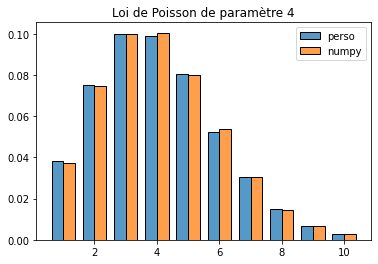

In [20]:
l=4
df = pd.DataFrame({
    "perso": np.array([poisson(l) for _ in range(N)]),
    "numpy": np.random.poisson(l,N)
})
sns.histplot(
    df.melt(var_name=''),
    x='value', hue='',
    multiple='dodge',
    shrink=.75,
    bins=np.arange(0.5, n+1.5, 1.),
    stat='density')
plt.title('Loi de Poisson de paramètre '+str(l))
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../images/2022/03/infinie.png')